In [1]:
import subprocess as sp
import sys,os,shutil,pickle,time
from os.path import join


In [2]:
import pandas as pd
import numpy as np

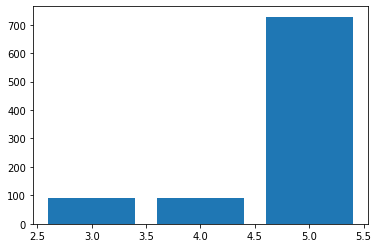

In [3]:
import matplotlib.pyplot as plt

dataset=pd.read_csv("iphonecamerareviews2.csv")
summarised_results = dataset["stars"].value_counts()
plt.bar(summarised_results.keys(), summarised_results.values)
plt.show()

In [4]:
df = pd.read_csv('iphonecamerareviews2.csv')
df.head(5)

,stars,comment,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word
0,5,iphone design good camera quality awesome also...,56,33,0,0,10,97,591,5.8
1,5,second apple device havent sold kidney got avi...,152,61,0,4,10,223,1429,5.7
2,5,phone bit big hold good android usersas per de...,19,4,0,0,0,29,181,5.3
3,5,bought iphone red absolutely love design insan...,74,20,0,1,5,85,568,5.9
4,5,awesome phone great camera quali,0,1,0,0,0,5,34,6.0


In [5]:
import seaborn as sns
import string
import re
!pip install -q wordcloud
import wordcloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nalinjindal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/nalinjindal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/nalinjindal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/nalinjindal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [6]:
from textblob import TextBlob

df['comment']= df['comment'].astype(str)

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity


df['polarity'] = df['comment'].apply(pol)
df['subjectivity'] = df['comment'].apply(sub)
df

,stars,comment,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word,polarity,subjectivity
0,5,iphone design good camera quality awesome also...,56,33,0,0,10,97,591,5.8,0.319318,0.606061
1,5,second apple device havent sold kidney got avi...,152,61,0,4,10,223,1429,5.7,0.184994,0.507269
2,5,phone bit big hold good android usersas per de...,19,4,0,0,0,29,181,5.3,0.444215,0.559504
3,5,bought iphone red absolutely love design insan...,74,20,0,1,5,85,568,5.9,0.025758,0.600649
4,5,awesome phone great camera quali,0,1,0,0,0,5,34,6.0,0.900000,0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...
905,3,iphone good phone every thing fine budget phon...,54,6,0,4,0,61,343,5.0,0.156061,0.381818
906,4,almost months using iphone gb apple known one ...,282,92,0,9,33,382,2635,6.2,0.204994,0.510737
907,5,proscamera quality life issue face heating iss...,9,12,0,1,2,31,209,6.6,-0.243750,0.450000
908,5,last months waiting best possible phone every ...,143,31,0,7,3,178,1085,5.5,0.355914,0.499462


In [7]:
df['polarity'] = df['polarity'].round(2)
df['subjectivity'] = df['subjectivity'].round(2)
df.sample(5)

,stars,comment,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word,polarity,subjectivity
422,5,phone bit big hold good android usersas per de...,19,4,0,0,0,29,181,5.3,0.44,0.56
66,4,almost months using iphone gb apple known one ...,282,92,0,9,33,382,2635,6.2,0.20,0.51
340,5,iphone design good camera quality awesome also...,56,33,0,0,10,97,591,5.8,0.32,0.61
456,4,almost months using iphone gb apple known one ...,282,92,0,9,33,382,2635,6.2,0.20,0.51
281,5,second apple device havent sold kidney got avi...,152,61,0,4,10,223,1429,5.7,0.18,0.51


In [8]:
df2= pd.DataFrame()

In [9]:
for i in range (1,5):
  df2.loc[i,'polarity']= (df.head(100000).loc[df.stars == i].polarity.mean())
  df2.loc[i,'subjectivity']= (df.head(100000).loc[df.stars ==i].subjectivity.mean())

In [10]:
df2

,polarity,subjectivity
1,NaN,NaN
2,NaN,NaN
3,0.16,0.38
4,0.20,0.51


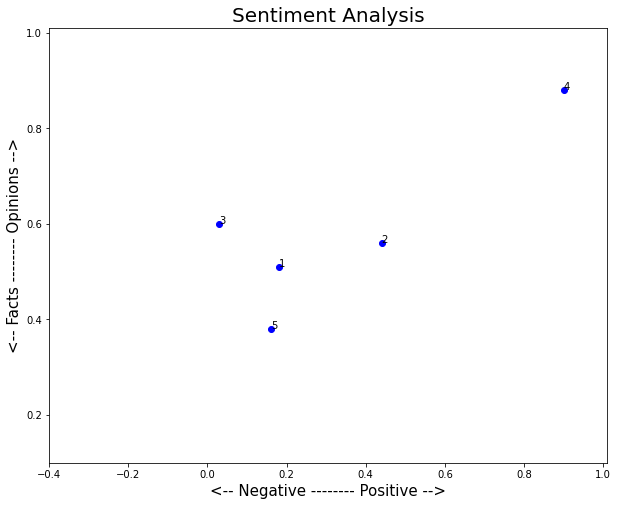

In [15]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index in range(1,6):
    x = df.polarity.loc[index]
    y = df.subjectivity.loc[index]
    plt.scatter(x, y, color='blue')
    plt.text(x+.0001, y+.0001, index, fontsize=10)
    plt.xlim(-0.4, 1.01) 
    plt.ylim(0.1, 1.01) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [12]:
#At here, it looks I created a new column called reviews and gave values 'Good Reviews' and 'Bad Reviews'
#But then I deleted it.  It needs to be recreated.      

#Probably the code I use was this:
#df3= pd.DataFrame()
#df3['review']= df.index
#df3.rename(comment={0:'Bad Reviews',1:'Good Reviews'}, inplace=True)

In [13]:
# df3= pd.DataFrame()
#for i in range (0,2):
 #  df3.loc[i,'polarity']= (df.head(100000).loc[df.Good_reviews == i].polarity.mean())
 #  df3.loc[i,'subjectivity']= (df.head(100000).loc[df.Good_reviews == i].subjectivity.mean())
  
# df3

In [14]:
#import matplotlib.pyplot as plt

#plt.rcParams['figure.figsize'] = [10, 8]
#
#for index, reviews in enumerate(df3.index):
#    x = df3.polarity.loc[reviews]
#    y = df3.subjectivity.loc[reviews]
#    plt.scatter(x, y, color='blue')
#    plt.text(x+.001, y+.001, df3['reviews'][index], fontsize=10)
#    plt.xlim(-.01, .4) 
#    plt.ylim(.5, .6) 
#    
#plt.title('Sentiment Analysis', fontsize=20)
#plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
#plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

#plt.show()


In [15]:
#a = df.groupby(['Good_reviews'])['Id'].count()
#a = a.reset_index()
#a = a.rename(columns={'Id': 'number of samples'})
#fig, ax = plt.subplots(figsize=(4, 6))

#sns.barplot(x='Good_reviews', y='number of samples', data=a)

In [16]:
df2= df
df2['word_count']= df2['word_count'] //50*50

<AxesSubplot:xlabel='word_count'>

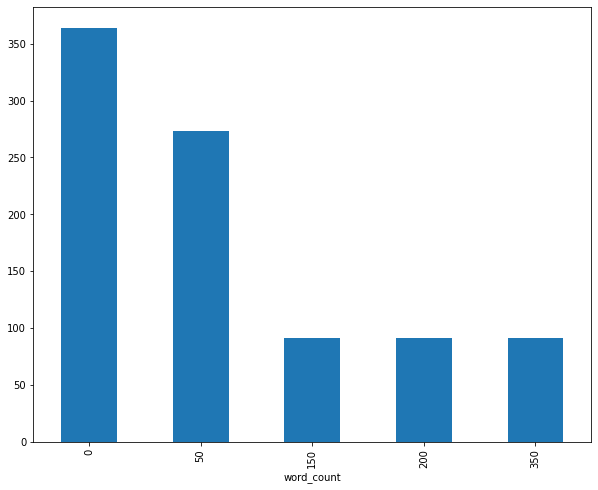

In [17]:
df.polarity.groupby(df.word_count // 50 * 50).count().plot(kind ='bar')

In [18]:
df_sub= df.loc[df.word_count //10*10]

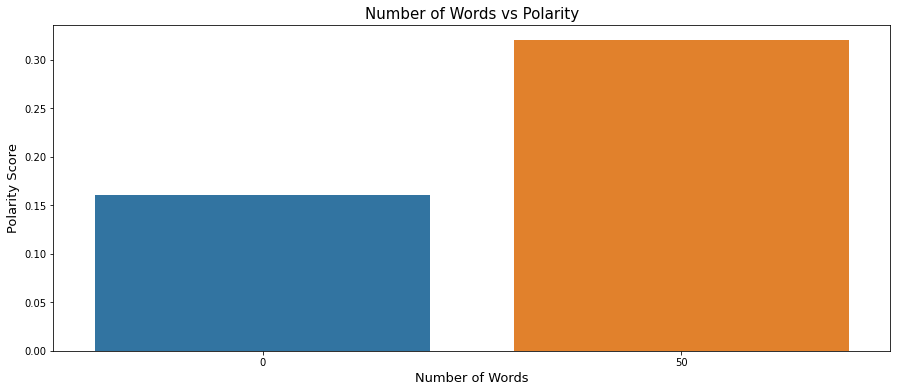

In [19]:
plt.figure(figsize=(15,6))
sns.barplot(x='word_count', y='polarity', data=df_sub)
plt.xlabel('Number of Words', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Number of Words vs Polarity', fontsize=15)
plt.show();

/home/nalinjindal/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Subjectivity Score')

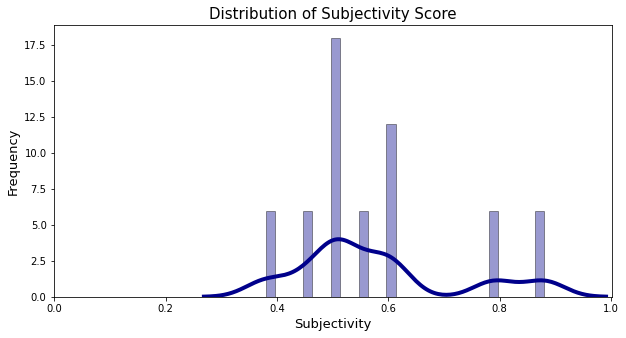

In [20]:
# Density Plot and Histogram of subjectivity
plt.figure(figsize=(10,5))
sns.distplot(df['subjectivity'], hist=True, kde=True, 
             bins=int(30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Subjectivity Score', fontsize=15)